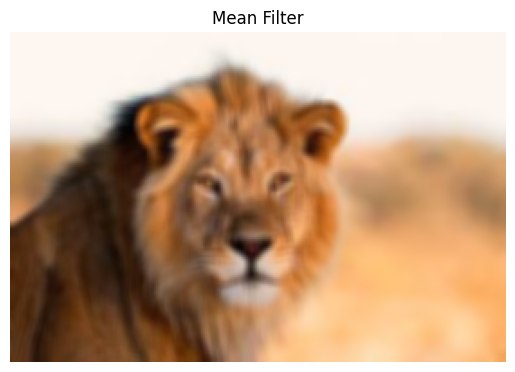

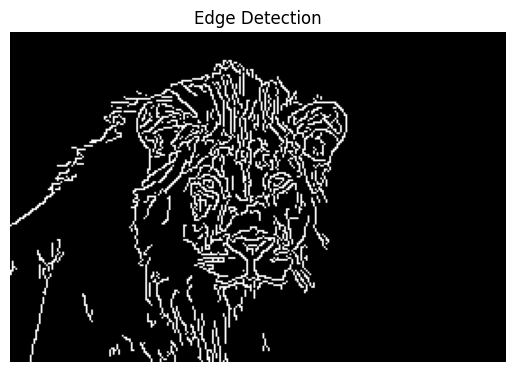

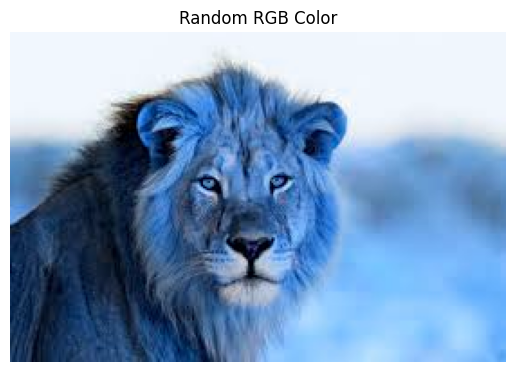

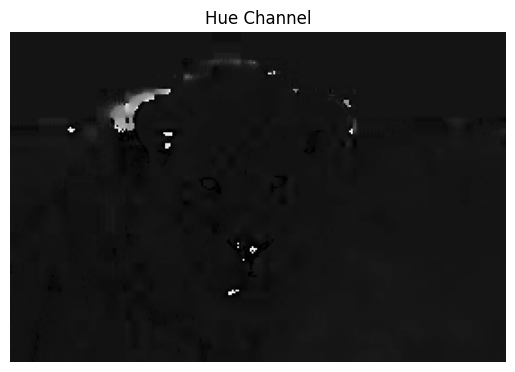

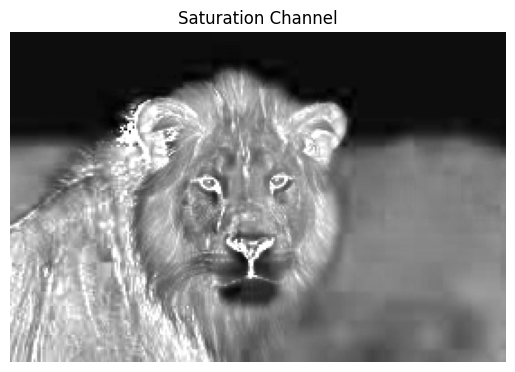

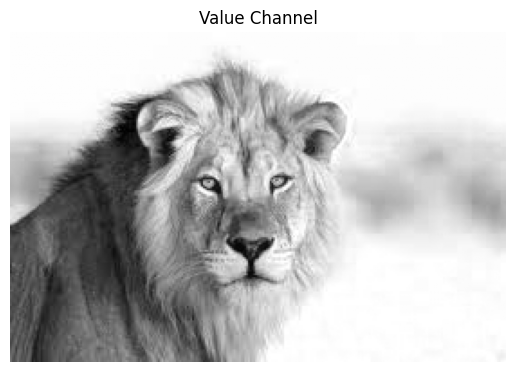

In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Đọc ảnh gốc
img = cv2.imread('a.jpg')
if img is None:
    raise FileNotFoundError("Không tìm thấy ảnh a.jpg")

# Hàm hiển thị ảnh
def show_image(title, image, cmap=None):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')

# 1. Mean Filter
mean_filtered = cv2.blur(img, (5, 5))
cv2.imwrite('a_mean_filtered.jpg', mean_filtered)
show_image("Mean Filter", cv2.cvtColor(mean_filtered, cv2.COLOR_BGR2RGB))

# 2. Edge Detection (Canny)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
cv2.imwrite('a_edges.jpg', edges)
show_image("Edge Detection", edges, cmap='gray')

# 3. Đổi màu RGB bằng tráo kênh
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
channels = [0, 1, 2]
random.shuffle(channels)
random_color = img_rgb[:, :, channels]
random_bgr = cv2.cvtColor(random_color, cv2.COLOR_RGB2BGR)
cv2.imwrite('a_random_color.jpg', random_bgr)
show_image("Random RGB Color", random_color)

# 4. HSV và tách kênh
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

cv2.imwrite('a_hue.jpg', h)
cv2.imwrite('a_saturation.jpg', s)
cv2.imwrite('a_value.jpg', v)

show_image("Hue Channel", h, cmap='gray')
show_image("Saturation Channel", s, cmap='gray')
show_image("Value Channel", v, cmap='gray')

# Hiển thị tất cả ảnh
plt.show()

Menu:
 I: Image Inverse
 G: Gamma Correction
 L: Log Transformation
 H: Histogram Equalization
 C: Contrast Stretching
 A: Adaptive Histogram Equalization
 Q: Quit
Đang áp dụng: Inverse
Đã lưu: output_inverse_1.jpg
Đã lưu: output_inverse_2.jpg
Đã lưu: output_inverse_3.jpg


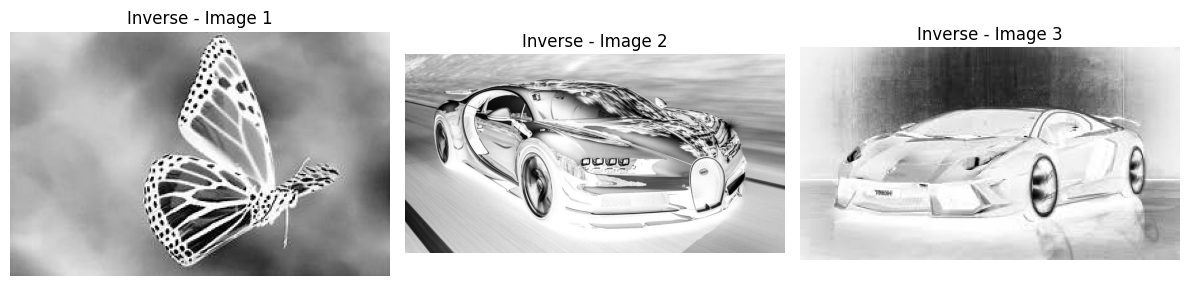

Đang áp dụng: Gamma
Đã lưu: output_gamma_1.jpg
Đã lưu: output_gamma_2.jpg
Đã lưu: output_gamma_3.jpg


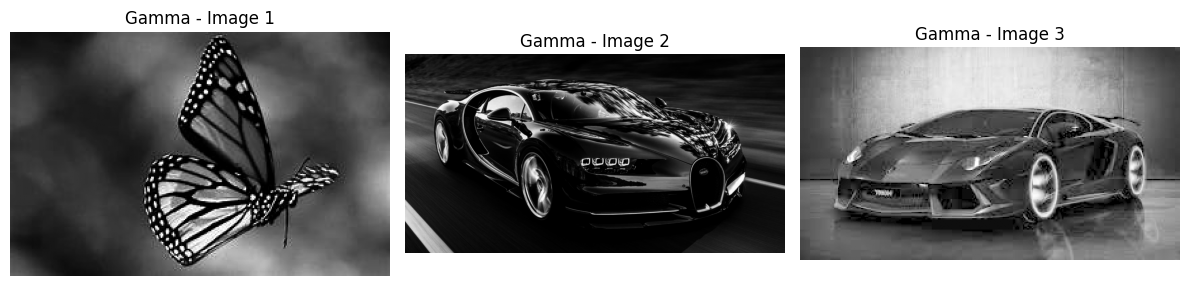

Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Phím không hợp lệ.
Đang áp dụng: Log
Đã lưu: output_log_1.jpg
Đã lưu: output_log_2.jpg
Đã lưu: output_log_3.jpg


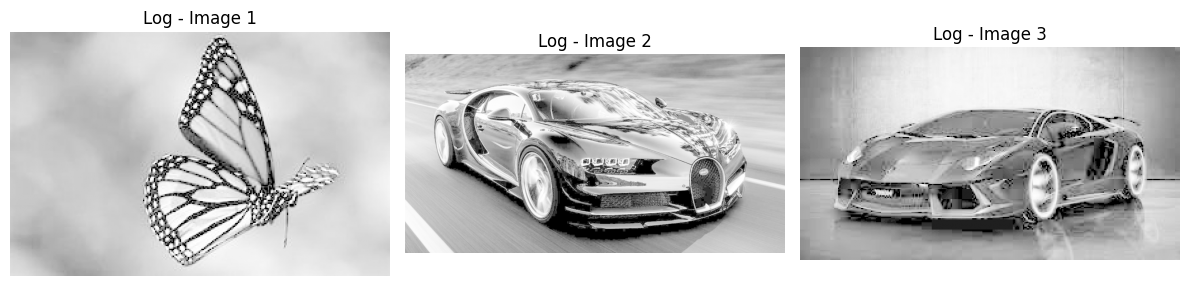

Phím không hợp lệ.


In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Đọc 3 ảnh grayscale
image_files = ['image1.jpg', 'image2.jpg', 'image3.jpg']
images = []
for file in image_files:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Không tìm thấy ảnh {file}")
    images.append(img)

# Hàm hiển thị ảnh dùng matplotlib
def show_images(img_list, titles, op_name):
    plt.figure(figsize=(12, 4))
    for i, img in enumerate(img_list):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{op_name} - Image {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Các phép biến đổi ảnh
def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma):
    norm = img / 255.0
    corrected = np.power(norm, gamma)
    return np.uint8(corrected * 255)

def log_transform(img, c):
    img_float = img.astype(np.float32)
    log_img = c * np.log1p(img_float)
    log_img = cv2.normalize(log_img, None, 0, 255, cv2.NORM_MINMAX)
    return np.uint8(log_img)

def hist_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img, r1, r2):
    stretched = np.clip((img - r1) * 255 / (r2 - r1), 0, 255)
    return np.uint8(stretched)

def adaptive_hist_equalization(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(img)

# Map phím → hàm xử lý
operations = {
    'i': ('Inverse', image_inverse),
    'g': ('Gamma', lambda img: gamma_correction(img, random.uniform(0.5, 2.0))),
    'l': ('Log', lambda img: log_transform(img, random.uniform(1.0, 5.0))),
    'h': ('Histogram', hist_equalization),
    'c': ('Contrast', lambda img: contrast_stretching(img,
                                                      random.randint(0, 100),
                                                      random.randint(150, 255))),
    'a': ('Adaptive', adaptive_hist_equalization),
}

# In menu
print("Menu:")
print(" I: Image Inverse")
print(" G: Gamma Correction")
print(" L: Log Transformation")
print(" H: Histogram Equalization")
print(" C: Contrast Stretching")
print(" A: Adaptive Histogram Equalization")
print(" Q: Quit")

# Vòng lặp chính
while True:
    key = input("Nhập phím lựa chọn: ").lower()
    if key == 'q':
        break

    if key in operations:
        op_name, op_func = operations[key]
        print(f"Đang áp dụng: {op_name}")

        output_imgs = []
        for i, img in enumerate(images):
            result = op_func(img)
            output_imgs.append(result)

            filename = f"output_{op_name.lower()}_{i+1}.jpg"
            cv2.imwrite(filename, result)
            print(f"Đã lưu: {filename}")

        # Hiển thị ảnh dưới dạng matplotlib
        show_images(output_imgs, image_files, op_name)

    else:
        print("Phím không hợp lệ.")

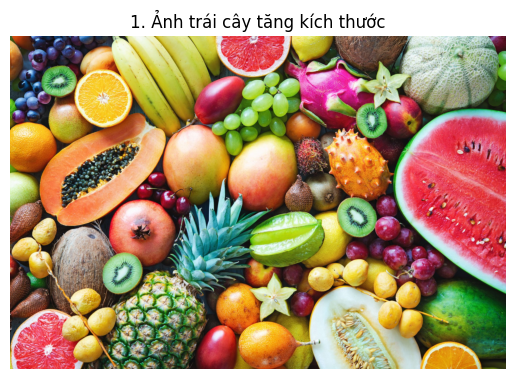

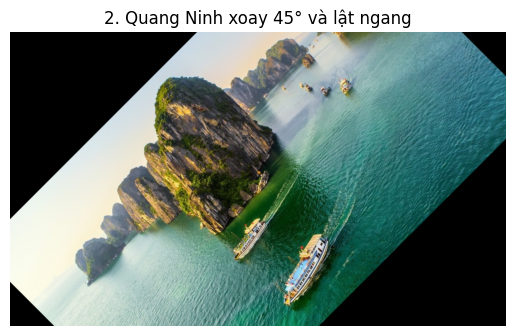

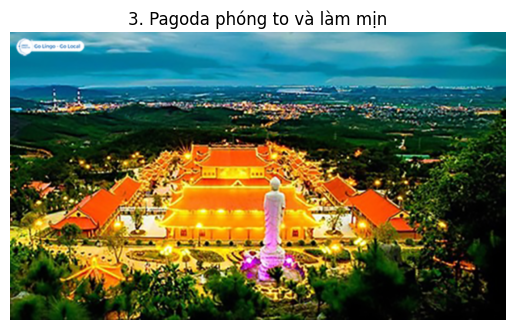

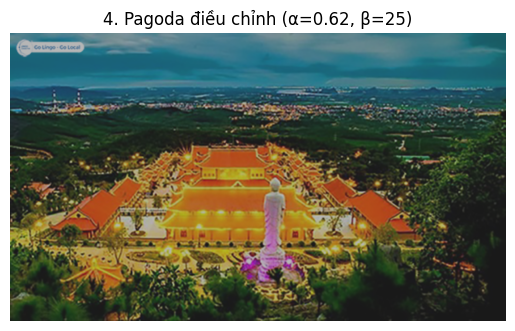

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Hàm hiển thị ảnh
def show(title, img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Tăng kích thước ảnh trái cây
img_fruit = cv2.imread('colorful-ripe-tropical-fruits.jpg')
if img_fruit is None:
    raise FileNotFoundError("Không tìm thấy ảnh trái cây")

height, width = img_fruit.shape[:2]
resized_fruit = cv2.resize(img_fruit, (width + 30, height + 30))
cv2.imwrite('resized_fruit.jpg', resized_fruit)
show("1. Ảnh trái cây tăng kích thước", resized_fruit)

# 2. Xoay 45 độ và lật ngang ảnh quang-ninh
img_qn = cv2.imread('quang_ninh.jpg')
if img_qn is None:
    raise FileNotFoundError("Không tìm thấy ảnh quang-ninh")

(h, w) = img_qn.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(img_qn, M, (w, h))
flipped = cv2.flip(rotated, 1)
cv2.imwrite('rotated_flipped_qn.jpg', flipped)
show("2. Quang Ninh xoay 45° và lật ngang", flipped)

# 3. Phóng to và làm mịn ảnh pagoda
img_pagoda = cv2.imread('pagoda.jpg')
if img_pagoda is None:
    raise FileNotFoundError("Không tìm thấy ảnh pagoda")

resized_pagoda = cv2.resize(img_pagoda, (0, 0), fx=5, fy=5)
blurred = cv2.GaussianBlur(resized_pagoda, (7, 7), 0)
cv2.imwrite('blurred_pagoda.jpg', blurred)
show("3. Pagoda phóng to và làm mịn", blurred)

# 4. Áp dụng công thức tuyến tính: I_out = α * I_in + β
alpha = random.uniform(0.5, 2.0)     # độ tương phản
beta = random.randint(-50, 50)       # độ sáng
adjusted = np.clip(alpha * resized_pagoda + beta, 0, 255).astype(np.uint8)
cv2.imwrite('adjusted_pagoda.jpg', adjusted)
show(f"4. Pagoda điều chỉnh (α={alpha:.2f}, β={beta})", adjusted)